<a href="https://colab.research.google.com/github/nehana4sph/TCS-iON_RIO-125-Forecasting-System/blob/main/Forecasting_System_Modelling_Fitting_and_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas==1.2.0
!pip install xlrd==2.0.1
#!pip install pystan==2.19
#!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import xlrd



Mounted at /content/gdrive


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Internship/Superstore.xls')
print(df.head())
print(df.tail())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


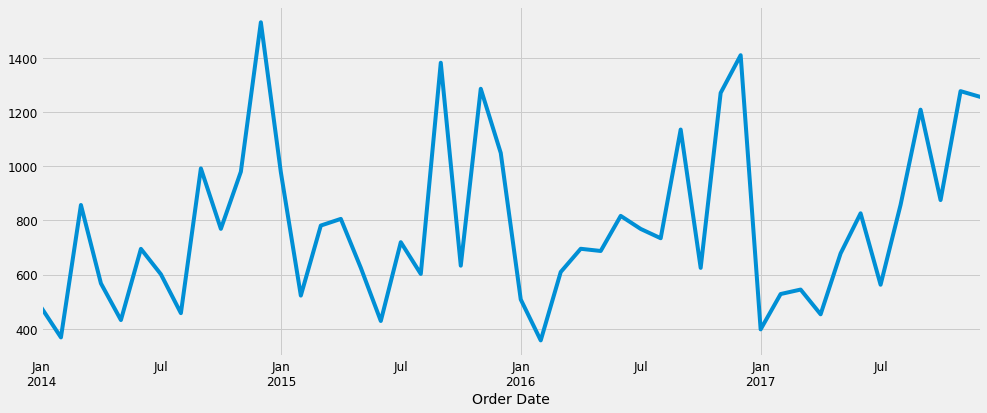

In [ ]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace = True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture.index
y = furniture['Sales'].resample('MS').mean()
print(y['2017':])
y.plot(figsize=(15,6))
plt.show()



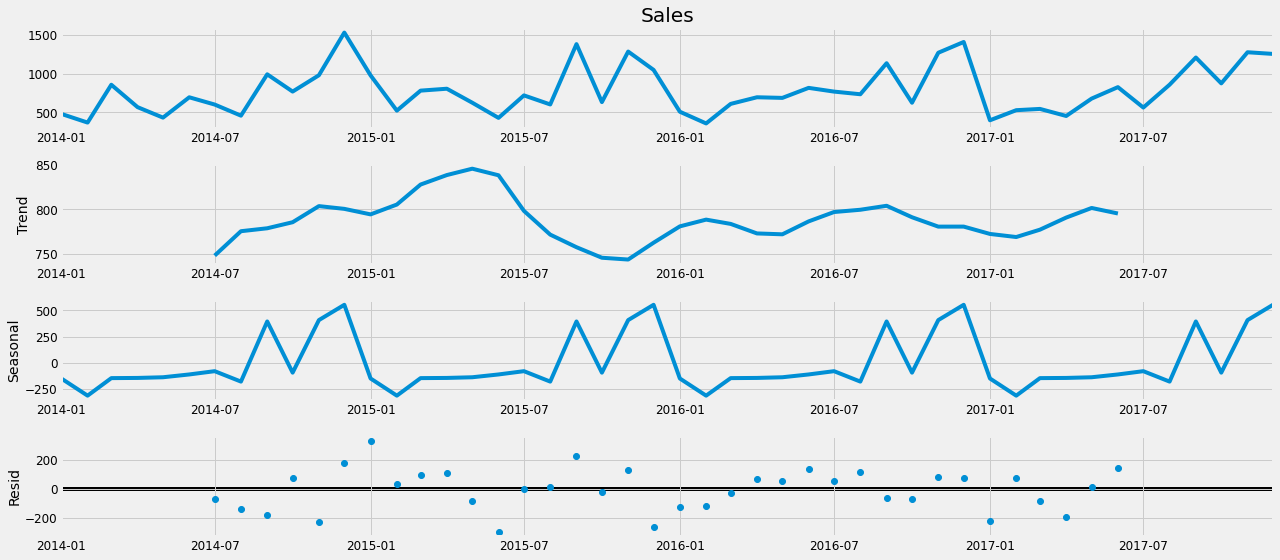

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA......')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA......
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
          continue
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])



ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205915


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1447.9568704136177
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:302.27028997935736
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.2314433418338


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1314.4533646477407
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:304.24882803033336
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.9252270758097
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2668.7209477772303
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.56074298091517
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:291.6261389673299


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.591257738131


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2578.4146112104027
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.9884876946868
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:291.8725576437098
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.8947668259312
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1363.557134110724
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.6378567269187
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:304.9671228167952
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1383.458576144629


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:306.9113200151447
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:649.9056176817271
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1672.2485502777806


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:458.8705548482728
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:279.5806233401351
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:486.18329774427036


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2518.988582989687
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:310.7574368417285
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:281.55766214612555
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:692.1645522067713
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1393.6213595625052


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:304.20776751609657
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:480.92593679351955


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1290.9773755653473
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:304.46646750846116
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:304.5842692143826
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:665.7794442186333


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:2672.711879517784
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:468.3685195814164
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:293.34221939658994
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:482.5763323876942


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:2212.993078957893
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:306.01560021207973
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:293.7513188199571
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1412.3673233678842


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:479.2003422281135
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:300.2130611619097
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:475.3403658784638
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1211.0366992396605
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:300.62709013454116
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:302.3264992504886
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:649.0318019835482
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:453.57441602461193
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:460.4762687609349
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:281.38730069394154
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:469.5250354660833


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:842.8032093073701
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:297.78754395392707
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:283.36610143633357
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0836      0.243      0.344      0.731      -0.392       0.560
ma.L1         -1.0000   1483.471     -0.001      0.999   -2908.550    2906.550
ma.S.L12      -1.0001   1483.490     -0.001      0.999   -2908.587    2906.587
sigma2       2.68e+04      0.037   7.31e+05      0.000    2.68e+04    2.68e+04


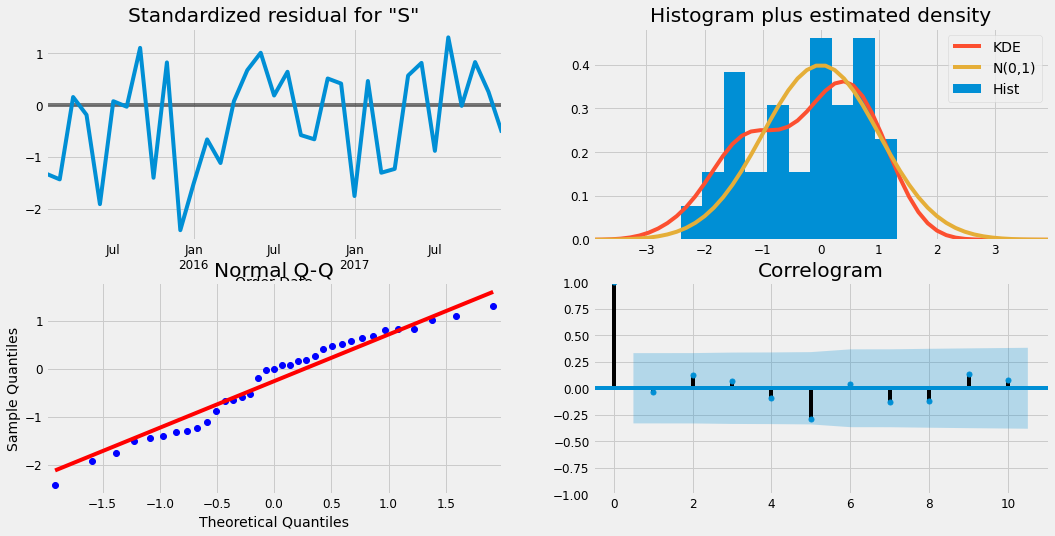

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

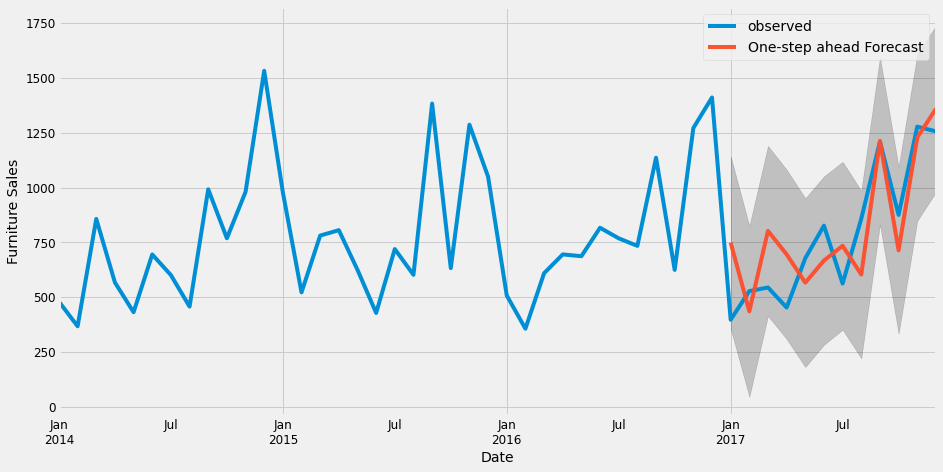

The Mean Squared Error of our forecasts is 35686.32
The Root Mean Squared Error of our forecasts is 188.91


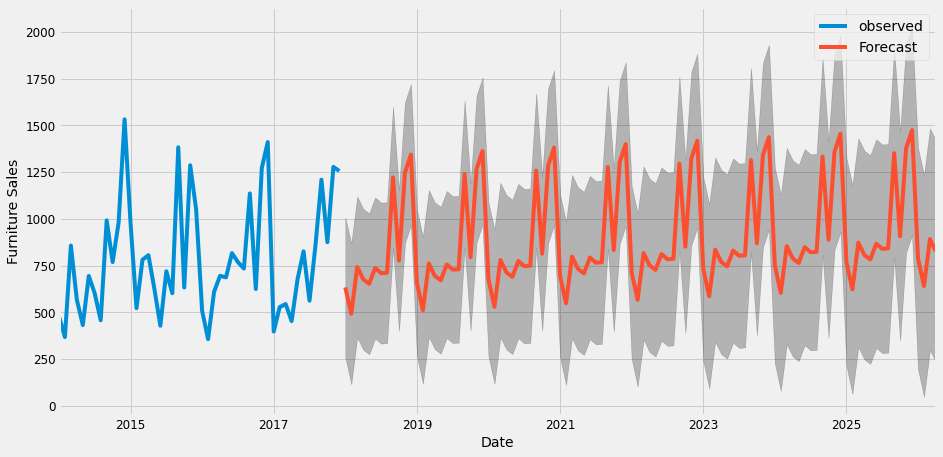

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast' , alpha = 7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha= .2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01' :]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()
